In [36]:
import rmgpy.species
import rmgpy.kinetics
import rmgpy.thermo
import rmgpy.data.rmg

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define Propane as a Species object

In [3]:
CCC = rmgpy.species.Species(smiles='CCC')
display(CCC)

In [4]:
CCC.thermo

In [81]:
H2 = rmgpy.species.Species(smiles='[H][H]')

In [ ]:
# pickle
# pass in arguments with sys
# pointers/memory
# chemkin files


In [ ]:
# Read in the RMG-database

In [6]:
database = rmgpy.data.rmg.RMGDatabase()

thermo_libraries = [
    'Klippenstein_Glarborg2016',
    'BurkeH2O2',
    'thermo_DFT_CCSDTF12_BAC', 
    'DFT_QCI_thermo',
    'primaryThermoLibrary',
    'CurranPentane'
]

database.load(
    path = rmgpy.settings['database.directory'],
    thermo_libraries = thermo_libraries,
    transport_libraries = [],
    reaction_libraries = [],
    seed_mechanisms = [],
    kinetics_families = ['H_Abstraction'],
    kinetics_depositories = ['training'],
    depository = False,
)
# !!!!!!!!!!!!!!!!!!!!!!!! Keep this for kinetics families
for family in database.kinetics.families:
    if not database.kinetics.families[family].auto_generated:
        database.kinetics.families[family].add_rules_from_training(thermo_database=database.thermo)
        database.kinetics.families[family].fill_rules_by_averaging_up(verbose=True)



In [7]:
print(database)

In [8]:
print(database.thermo)

In [9]:
print(database.kinetics)

In [11]:
print(database.thermo.libraries)

{'Klippenstein_Glarborg2016': <rmgpy.data.thermo.ThermoLibrary object at 0x7f8cb35dce50>, 'BurkeH2O2': <rmgpy.data.thermo.ThermoLibrary object at 0x7f8cb35dc050>, 'thermo_DFT_CCSDTF12_BAC': <rmgpy.data.thermo.ThermoLibrary object at 0x7f8cb35df110>, 'DFT_QCI_thermo': <rmgpy.data.thermo.ThermoLibrary object at 0x7f8cb35df510>, 'primaryThermoLibrary': <rmgpy.data.thermo.ThermoLibrary object at 0x7f8cb3563410>, 'CurranPentane': <rmgpy.data.thermo.ThermoLibrary object at 0x7f8cb3778190>}


In [12]:
database.thermo.libraries['CurranPentane']

In [58]:
for i, key in enumerate(database.thermo.libraries['CurranPentane'].entries):
    entry = database.thermo.libraries['CurranPentane'].entries[key]
    print(i, entry)
    if i >= 1:
        break
    

0 H
1 H2


In [59]:
print(entry.index)
print(entry.label)
print(entry.item)

1
H2
<Molecule "[H][H]">


In [60]:
print(entry.item.to_adjacency_list())

1 H u0 p0 c0 {2,S}
2 H u0 p0 c0 {1,S}



In [61]:
my_thermo_data = entry.data
print(my_thermo_data)

NASA(polynomials=[NASAPolynomial(coeffs=[2.34433,0.00798052,-1.94782e-05,2.01572e-08,-7.37612e-12,-917.935,0.68301], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[2.93287,0.000826608,-1.46402e-07,1.541e-11,-6.88805e-16,-813.066,-1.02433], Tmin=(1000,'K'), Tmax=(6000,'K'))], Tmin=(200,'K'), Tmax=(6000,'K'))


In [62]:
my_thermo_data.get_enthalpy(1000)

20686.38693556533

In [63]:
my_thermo_data.polynomials

[NASAPolynomial(coeffs=[2.34433,0.00798052,-1.94782e-05,2.01572e-08,-7.37612e-12,-917.935,0.68301], Tmin=(200,'K'), Tmax=(1000,'K')),
 NASAPolynomial(coeffs=[2.93287,0.000826608,-1.46402e-07,1.541e-11,-6.88805e-16,-813.066,-1.02433], Tmin=(1000,'K'), Tmax=(6000,'K'))]

In [64]:
# Plot a thermo example
N = 101

Ts = np.linspace(300, 3000, N)
H = np.zeros_like(Ts)
S = np.zeros_like(Ts)
Cp = np.zeros_like(Ts)

for i in range(len(Ts)):
    H[i] = my_thermo_data.get_enthalpy(Ts[i])
    S[i] = my_thermo_data.get_entropy(Ts[i])
    Cp[i] = my_thermo_data.get_heat_capacity(Ts[i])


In [65]:
print(my_thermo_data.get_enthalpy.__doc__)

NASA.get_enthalpy(self, double T) -> double

        Return the enthalpy :math:`H(T)` in J/mol at the specified
        temperature `T` in K.
        


Text(0, 0.5, 'Enthalpy (J/mol)')

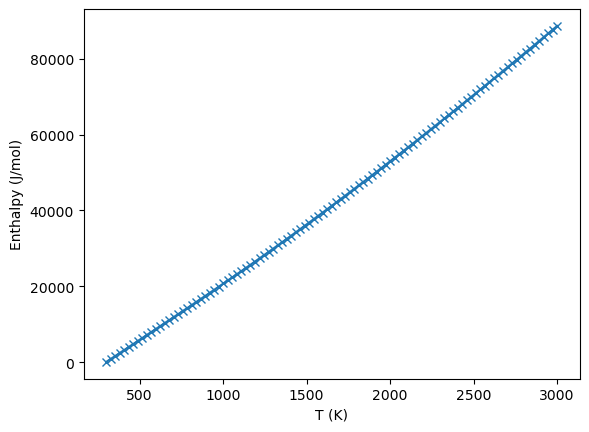

In [66]:
plt.plot(Ts, H, marker='x')
plt.xlabel('T (K)')
plt.ylabel('Enthalpy (J/mol)')

In [67]:
my_thermo_data.get_enthalpy(298)

-4.330699985000105

In [41]:
# Get the thermo of CCC using CurranPentane library

(1001,)

In [73]:
database.thermo.get_thermo_data_from_library(CCC, database.thermo.libraries['CurranPentane'])

(NASA(polynomials=[NASAPolynomial(coeffs=[4.21093,0.00170887,7.0653e-05,-9.20061e-08,3.64618e-11,-14381.1,5.61004], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[6.6692,0.0206109,-7.36512e-06,1.18434e-09,-7.06915e-14,-16275.4,-13.1943], Tmin=(1000,'K'), Tmax=(6000,'K'))], Tmin=(200,'K'), Tmax=(6000,'K'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(249.434,'J/(mol*K)'), label="""C3H8"""),
 <Entry index=70 label="C3H8">)

In [87]:
curran_H2_thermo, library, entry= database.thermo.get_thermo_data_from_library(H2, database.thermo.libraries['CurranPentane'])
burke_H2_thermo, library, entry= database.thermo.get_thermo_data_from_library(H2, database.thermo.libraries['BurkeH2O2'])

burke_H2_thermo = burke_H2_thermo.to_nasa(300, 3000, 1000)

print(curran_H2_thermo)
print()
print(burke_H2_thermo)

NASA(polynomials=[NASAPolynomial(coeffs=[2.34433,0.00798052,-1.94782e-05,2.01572e-08,-7.37612e-12,-917.935,0.68301], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[2.93287,0.000826608,-1.46402e-07,1.541e-11,-6.88805e-16,-813.066,-1.02433], Tmin=(1000,'K'), Tmax=(6000,'K'))], Tmin=(200,'K'), Tmax=(6000,'K'), Cp0=(29.1007,'J/(mol*K)'), CpInf=(37.4151,'J/(mol*K)'), label="""H2""")

NASA(polynomials=[NASAPolynomial(coeffs=[3.13173,0.0020779,-4.13613e-06,3.59666e-09,-1.04398e-12,-995.633,-2.60152], Tmin=(300,'K'), Tmax=(1057.74,'K')), NASAPolynomial(coeffs=[3.78525,-0.00106491,1.27288e-06,-4.12619e-10,4.54634e-14,-1096.33,-5.61353], Tmin=(1057.74,'K'), Tmax=(3000,'K'))], Tmin=(300,'K'), Tmax=(3000,'K'), E0=(-8.52128,'kJ/mol'), Cp0=(29.1007,'J/(mol*K)'), CpInf=(37.4151,'J/(mol*K)'), label="""H2""")


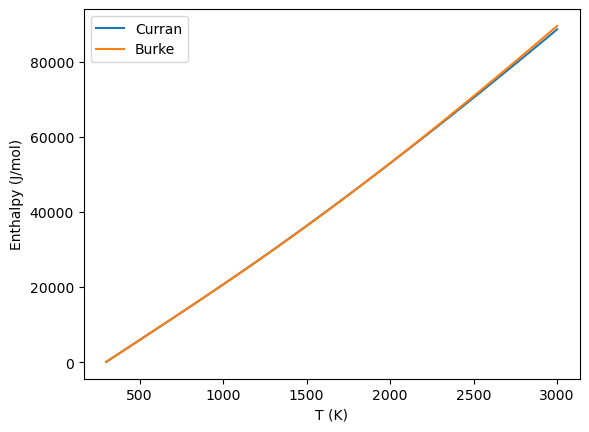

In [88]:
# Compare the two
N = 101

Ts = np.linspace(300, 3000, N)
H_Curran = np.zeros_like(Ts)
H_Burke = np.zeros_like(Ts)

for i in range(len(Ts)):
    H_Curran[i] = curran_H2_thermo.get_enthalpy(Ts[i])
    H_Burke[i] = burke_H2_thermo.get_enthalpy(Ts[i])

plt.plot(Ts, H_Curran, label='Curran')
plt.plot(Ts, H_Burke, label='Burke')
plt.xlabel('T (K)')
plt.ylabel('Enthalpy (J/mol)')
plt.legend()